# Parameter & Data Efficient Style-DCGAN for Dog Faces   


## Imports

#### wandb

In [ ]:
!pip -qqq install wandb pytorch-lightning torchmetrics

import wandb
from pytorch_lightning.loggers import WandbLogger

wandb.login()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.0/719.0 kB 46.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 43.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 61.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 18.6 MB/s eta 0:00:00


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

#### Pytorch-Lightning (Don't open... very large installation output)

In [ ]:
try:
  import lightning.pytorch as pl
except:
  print("[!] Couldn't find pytorch-lightning.\nInstalling it...\n")
  !pip install lightning
  import lightning.pytorch as pl

[!] Couldn't find pytorch-lightning.
Installing it...

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 kB 49.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.9/66.9 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from lightning.pytorch.utilities.model_summary import ModelSummary

In [ ]:
from pytorch_lightning import seed_everything

#### Standard imports

In [ ]:
import os
import shutil
import pathlib

from PIL import Image
import numpy as np
import cv2 as cv
import random
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim

from torch.utils.data import DataLoader, random_split
from torch.utils.data import Dataset

import torchvision
from torchvision import datasets

In [ ]:
import torchvision.transforms as T
from torchvision.transforms import Compose, ToTensor, Resize

##### Albumentations

In [ ]:
try:
  import albumentations as A
  from albumentations.pytorch import ToTensorV2
except:
  print("[!] Couldn't find albumentations... installing it.")
  !pip install -U albumentations
  import albumentations as A
  from albumentations.pytorch import ToTensorV2

##### Torchmetrics

In [ ]:
try:
  import torchmetrics
except:
  print(f"[!] Torchmetrics couldn't be imported.\nInstalling...")
  !pip install torchmetrics

## Custom Utilities

In [ ]:
# Folder Utilities ----------------------------

## Create dir if it doesn't exist
def create_dir(dir_name):
  if not os.path.exists(f'/content/{dir_name}'):
    os.mkdir(f'/content/{dir_name}')

## Delete dir: checkpoints
def delete_dir(dir_name):
  if os.path.isdir(f'/content/{dir_name}'):
    shutil.rmtree(f'/content/{dir_name}')

# ---------------------------------------------

## Transforms

In [ ]:
# TODO: For experiments later on!
# train_transform = A.Compose(
#     [
#         A.SmallestMaxSize(max_size=160),
#         A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=15, p=0.5),
#         A.RandomCrop(height=128, width=128),
#         A.RGBShift(r_shift_limit=15, g_shift_limit=15, b_shift_limit=15, p=0.5),
#         A.RandomBrightnessContrast(p=0.5),
#         A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
#         ToTensorV2(),
#     ]
# )

## Dataset

### Download and set-up dir structure

In [ ]:
!mkdir -p ./data
!wget -O ./data/afhq.zip -N https://www.dropbox.com/s/t9l9o3vsx2jai3z/afhq.zip?dl=0
!unzip ./data/afhq.zip -d ./data
!rm ./data/afhq.zip

Streaming output truncated to the last 5000 lines.
  inflating: ./data/afhq/train/wild/flickr_wild_001384.jpg  
  inflating: ./data/afhq/train/wild/flickr_wild_001385.jpg  
  inflating: ./data/afhq/train/wild/flickr_wild_001386.jpg  
  inflating: ./data/afhq/train/wild/flickr_wild_001387.jpg  
  inflating: ./data/afhq/train/wild/flickr_wild_001388.jpg  
  inflating: ./data/afhq/train/wild/flickr_wild_001389.jpg  
  inflating: ./data/afhq/train/wild/flickr_wild_001390.jpg  
  inflating: ./data/afhq/train/wild/flickr_wild_001391.jpg  
  inflating: ./data/afhq/train/wild/flickr_wild_001392.jpg  
  inflating: ./data/afhq/train/wild/flickr_wild_001393.jpg  
  inflating: ./data/afhq/train/wild/flickr_wild_001394.jpg  
  inflating: ./data/afhq/train/wild/flickr_wild_001395.jpg  
  inflating: ./data/afhq/train/wild/flickr_wild_001396.jpg  
  inflating: ./data/afhq/train/wild/flickr_wild_001399.jpg  
  inflating: ./data/afhq/train/wild/flickr_wild_001400.jpg  
  inflating: ./data/afhq/train/wil

In [ ]:
! rm -rf ./data/afhq/train/cat ./data/afhq/train/wild ./data/afhq/val/cat ./data/afhq/val/wild

### Dataset & DataLoader

In [ ]:
# Log this config file to wandb
CONFIG = dict(
    seed=42,
    DATA_ROOT = '/content/data/afhq/',
    BATCH_SIZE = 32,
    WORKERS = 2,
    IMG_SIZE = (64,64),
    NUM_EPOCHS = 20,
    lr = 0.0005,
    b1 = 0.5,
    b2 = 0.999,
    nc = 3,   # Number of channels in images.
    nz = 100, # Latent vector size
    ngf = 64, # Size of feature maps in G
    ndf = 64,  # Size of feature maps in D
    disc_steps=1,
    checkpoint_path='/content/checkpoints/',
    min_lr=0.00005
    )

In [ ]:
seed_everything(CONFIG['seed'])

INFO:lightning_fabric.utilities.seed:Global seed set to 42


42

In [ ]:
# device = torch.device('cpu')
if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')

device

device(type='cuda')

In [ ]:
#TODO: Use A.resize (redundant?) : 64x64x3 (as per assignment)
afhq_train_dataset = datasets.ImageFolder(root=CONFIG['DATA_ROOT']+'train',
                                          transform=Compose([Resize(CONFIG['IMG_SIZE']),
                                                             ToTensor()])
                                          )

afhq_val_dataset = datasets.ImageFolder(root=CONFIG['DATA_ROOT']+'val',
                                        transform=Compose([Resize(CONFIG['IMG_SIZE']),
                                                           ToTensor()])
                                        )

In [ ]:
train_dataloader = DataLoader(afhq_train_dataset,
                              batch_size=CONFIG['BATCH_SIZE'],
                              shuffle=True)
val_dataloader = DataLoader(afhq_val_dataset,
                             batch_size=CONFIG['BATCH_SIZE'],
                             shuffle=True)

In [ ]:
print(len(train_dataloader), len(val_dataloader))

149 16


## Sanity Visualizations

#### Re-run this cell ↓ to generate a new grid everytime

<Figure size 800x600 with 0 Axes>

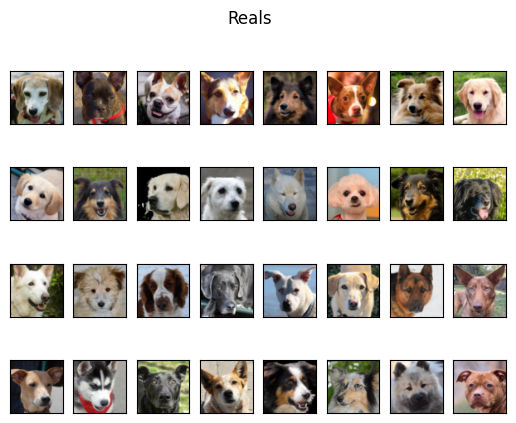

In [ ]:
batch, _ = next(iter(train_dataloader))

imgs = []
for id, img in enumerate(batch):
  imgs.append(np.array(img.permute(1,2,0)))

fig = plt.figure(figsize=(8,6))
fig, axs = plt.subplots(4,8)
for i, img in enumerate(imgs):
  col = i % 8
  axs[i//8, col].imshow(img)
  axs[i//8, col].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

plt.suptitle("Reals")
plt.show()

## Model Arch.


### Generator

In [ ]:
class Generator(nn.Module):
  def __init__(self):
    super(Generator, self).__init__()

    nz = CONFIG['nz']
    ngf = CONFIG['ngf']
    nc = CONFIG['nc']

    self.model = nn.Sequential(
        # input is Z, going into a convolution
        nn.ConvTranspose2d( nz, ngf * 8, 4, 1, 0, bias=False),
        nn.BatchNorm2d(ngf * 8),
        nn.ReLU(True),

        # state size. ``(ngf*8) x 4 x 4``
        nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
        nn.BatchNorm2d(ngf * 4),
        nn.ReLU(True),

        # state size. ``(ngf*4) x 8 x 8``
        nn.ConvTranspose2d( ngf * 4, ngf * 2, 4, 2, 1, bias=False),
        nn.BatchNorm2d(ngf * 2),
        nn.ReLU(True),

        # state size. ``(ngf*2) x 16 x 16``
        nn.ConvTranspose2d( ngf * 2, ngf, 4, 2, 1, bias=False),
        nn.BatchNorm2d(ngf),
        nn.ReLU(True),

        # state size. ``(ngf) x 32 x 32``
        nn.ConvTranspose2d( ngf, nc, 4, 2, 1, bias=False),
        nn.Tanh()
        # state size. ``(nc) x 64 x 64``
      )

  def forward(self, input):
    return self.model(input)

In [ ]:
from torchvision import models
from torchsummary import summary

In [ ]:
g = Generator().to(device)
summary(g, (100, 1, 1))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
   ConvTranspose2d-1            [-1, 512, 4, 4]         819,200
       BatchNorm2d-2            [-1, 512, 4, 4]           1,024
              ReLU-3            [-1, 512, 4, 4]               0
   ConvTranspose2d-4            [-1, 256, 8, 8]       2,097,152
       BatchNorm2d-5            [-1, 256, 8, 8]             512
              ReLU-6            [-1, 256, 8, 8]               0
   ConvTranspose2d-7          [-1, 128, 16, 16]         524,288
       BatchNorm2d-8          [-1, 128, 16, 16]             256
              ReLU-9          [-1, 128, 16, 16]               0
  ConvTranspose2d-10           [-1, 64, 32, 32]         131,072
      BatchNorm2d-11           [-1, 64, 32, 32]             128
             ReLU-12           [-1, 64, 32, 32]               0
  ConvTranspose2d-13            [-1, 3, 64, 64]           3,072
             Tanh-14            [-1, 3,

### Discriminator

In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        nc = CONFIG['nc']
        ndf= CONFIG['ndf']

        # TODO: Add drop-out layer for another experiment

        self.model = nn.Sequential(
            nn.Conv2d(nc, ndf, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 2),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 8),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(ndf * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.model(input)

In [ ]:
d = Discriminator().to(device)
summary(d, (3,64,64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           3,072
         LeakyReLU-2           [-1, 64, 32, 32]               0
            Conv2d-3          [-1, 128, 16, 16]         131,072
       BatchNorm2d-4          [-1, 128, 16, 16]             256
         LeakyReLU-5          [-1, 128, 16, 16]               0
            Conv2d-6            [-1, 256, 8, 8]         524,288
       BatchNorm2d-7            [-1, 256, 8, 8]             512
         LeakyReLU-8            [-1, 256, 8, 8]               0
            Conv2d-9            [-1, 512, 4, 4]       2,097,152
      BatchNorm2d-10            [-1, 512, 4, 4]           1,024
        LeakyReLU-11            [-1, 512, 4, 4]               0
           Conv2d-12              [-1, 1, 1, 1]           8,192
          Sigmoid-13              [-1, 1, 1, 1]               0
Total params: 2,765,568
Trainable param

### Spectral Discriminator

It is important note that spectral norm does not eliminate the need for batch norm. Spectral norm affects the weights of each layer, while batch norm affects the activations of each layer.

In [ ]:
class Spectral_Discriminator(nn.Module):
  """
  Claim:
    Spectral Norm stabilizes training

  Support:
    https://arxiv.org/abs/1802.05957
  """
  def __init__(self):
    super(Spectral_Discriminator, self).__init__()

    nc = CONFIG['nc']
    ndf= CONFIG['ndf']

    self.model = nn.Sequential(
            nn.Conv2d(nc, ndf, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),

            nn.utils.spectral_norm(nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False)),
            nn.BatchNorm2d(ndf * 2),
            nn.LeakyReLU(0.2, inplace=True),

            nn.utils.spectral_norm(nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False)),
            nn.BatchNorm2d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),

            nn.utils.spectral_norm(nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1, bias=False)),
            nn.BatchNorm2d(ndf * 8),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(ndf * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

  def forward(self, input):
    return self.model(input)

In [ ]:
torch.backends.cudnn.deterministic = False
torch.use_deterministic_algorithms(False)

In [ ]:
spd = Spectral_Discriminator().to(device)
summary(spd, (3,64,64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           3,072
         LeakyReLU-2           [-1, 64, 32, 32]               0
            Conv2d-3          [-1, 128, 16, 16]         131,072
       BatchNorm2d-4          [-1, 128, 16, 16]             256
         LeakyReLU-5          [-1, 128, 16, 16]               0
            Conv2d-6            [-1, 256, 8, 8]         524,288
       BatchNorm2d-7            [-1, 256, 8, 8]             512
         LeakyReLU-8            [-1, 256, 8, 8]               0
            Conv2d-9            [-1, 512, 4, 4]       2,097,152
      BatchNorm2d-10            [-1, 512, 4, 4]           1,024
        LeakyReLU-11            [-1, 512, 4, 4]               0
           Conv2d-12              [-1, 1, 1, 1]           8,192
          Sigmoid-13              [-1, 1, 1, 1]               0
Total params: 2,765,568
Trainable param

### Gen+Mapping+AdaIN

In [ ]:
class MappingNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    nz = CONFIG['nz']

    self.flatten = nn.Flatten()
    self.linear = nn.Linear(nz,nz)
    self.act = nn.LeakyReLU(negative_slope=0.2, inplace=True)

  def forward(self, z):
    z = F.normalize(z, dim=1)
    z = self.flatten(z)
    # print(z.shape)
    z1 = self.act(self.linear(z))
    z2 = self.act(self.linear(z1))
    z3 = self.act(self.linear(z2))
    w = self.act(self.linear(z3))

    # To sample ws for W-space exploration
    # print("w:", w)

    return w

In [ ]:
class AdaIN(nn.Module):
    def __init__(self, channels, w_dim):
      super().__init__()
      self.instance_norm = nn.InstanceNorm2d(channels)
      self.style_scale   = nn.Linear(w_dim, channels)
      self.style_bias    = nn.Linear(w_dim, channels)
      self.flatten       = nn.Flatten()

    def forward(self,x,w):
      w = self.flatten(w)
      # print("x:",x.shape, "w_flatten:", w.shape)
      x = self.instance_norm(x)
      # print("after instance norm, x:",x.shape)

      style_scale = self.style_scale(w).unsqueeze(2).unsqueeze(3)
      # print("style_scale.shape:", style_scale.shape)
      style_bias  = self.style_bias(w).unsqueeze(2).unsqueeze(3)
      # print("style_bias.shape:", style_bias.shape)
      return style_scale * x + style_bias

In [ ]:
class Generator_Mapper_AdaIN(nn.Module):
    def __init__(self):
        super(Generator_Mapper_AdaIN, self).__init__()

        nz = CONFIG['nz']
        ngf = CONFIG['ngf']
        nc = CONFIG['nc']

        self.starting_const = nn.Parameter(torch.randn(1, nz, 1, 1))

        self.mapper = MappingNetwork()
        self.act = nn.ReLU(inplace=True)

        # L1
        # state size. ``(ngf*8) x 4 x 4``
        self.conv_l1 = nn.ConvTranspose2d( nz, ngf * 8, 4, 1, 0, bias=False)
        self.ada_l1 = AdaIN(ngf * 8, nz)

        # L2
        # state size. ``(ngf*4) x 8 x 8``
        self.conv_l2 = nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False)
        self.ada_l2 = AdaIN(ngf * 4, nz)

        # L3
        # state size. ``(ngf*2) x 16 x 16``
        self.conv_l3 = nn.ConvTranspose2d( ngf * 4, ngf * 2, 4, 2, 1, bias=False)
        self.ada_l3 = AdaIN(ngf * 2, nz)

        # L4
        # state size. ``(ngf) x 32 x 32``
        self.conv_l4 = nn.ConvTranspose2d( ngf * 2, ngf, 4, 2, 1, bias=False)
        self.ada_l4 = AdaIN(ngf, nz)

        # L5
        # state size. ``(nc) x 64 x 64``
        self.conv_l5 = nn.ConvTranspose2d( ngf, nc, 4, 2, 1, bias=False)
        self.last_layer_act = nn.Tanh()


    def forward(self, input_noise):
      w = self.mapper(input_noise)
      w = w[:, :, None, None]

      x = self.act(self.ada_l1(self.conv_l1(self.starting_const), w))
      x = self.act(self.ada_l2(self.conv_l2(x), w))
      x = self.act(self.ada_l3(self.conv_l3(x), w))
      x = self.act(self.ada_l4(self.conv_l4(x), w))
      x = self.last_layer_act(self.conv_l5(x))
      return x

In [ ]:
g_map_ada = Generator_Mapper_AdaIN().to(device)
summary(g_map_ada, (100,1,1))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 100]               0
            Linear-2                  [-1, 100]          10,100
         LeakyReLU-3                  [-1, 100]               0
            Linear-4                  [-1, 100]          10,100
         LeakyReLU-5                  [-1, 100]               0
            Linear-6                  [-1, 100]          10,100
         LeakyReLU-7                  [-1, 100]               0
            Linear-8                  [-1, 100]          10,100
         LeakyReLU-9                  [-1, 100]               0
   MappingNetwork-10                  [-1, 100]               0
  ConvTranspose2d-11            [-1, 512, 4, 4]         819,200
          Flatten-12                  [-1, 100]               0
   InstanceNorm2d-13            [-1, 512, 4, 4]               0
           Linear-14                  [

## Lightning Recipe for training & testing

In [ ]:
class LIT_DCGAN(pl.LightningModule):

  def __init__(self,
               discriminator_model,
               generator_model,
               latent_dim: int = 100,
               lr: float = 0.003,
               b1: float = 0.5,
               b2: float = 0.999,
               disc_steps: int = 1):

    super().__init__()
    self.save_hyperparameters(ignore=[discriminator_model, generator_model])
    self.automatic_optimization = False

    self.discriminator = discriminator_model
    self.generator = generator_model

    self.validation_z = torch.randn(8, self.hparams.latent_dim)


  def configure_optimizers(self):
    lr = self.hparams.lr
    b1 = self.hparams.b1
    b2 = self.hparams.b2

    #---------------------------
    # Exp-2-3.1
    # optim_g = torch.optim.RMSprop(self.generator.parameters(), lr=lr)
    # optim_d = torch.optim.RMSprop(self.discriminator.parameters(), lr=lr)

    # # Exp-2-3.2
    # optim_g = torch.optim.SGD(self.generator.parameters(), lr=lr, momentum=0.9, nesterov=True)
    # optim_d = torch.optim.SGD(self.discriminator.parameters(), lr=lr, momentum=0.9, nesterov=True)

    # # Exp-2-3.3
    # optim_g = torch.optim.SGD(self.generator.parameters(), lr=lr, nesterov=False)
    # optim_d = torch.optim.SGD(self.discriminator.parameters(), lr=lr, nesterov=False)

    #----------------------------

    optim_g = torch.optim.Adam(self.generator.parameters(), lr=lr, betas=(b1,b2))
    optim_d = torch.optim.Adam(self.discriminator.parameters(), lr=lr, betas=(b1,b2))

    # sch_g = torch.optim.lr_scheduler.CosineAnnealingLR(optim_g,
    # T_max=CONFIG['NUM_EPOCHS']*len(train_dataloader)/CONFIG['BATCH_SIZE],
    #  eta_min=CONFIG['min_lr'])

    # sch_d = torch.optim.lr_scheduler.CosineAnnealingLR(optim_d,
    # T_max=CONFIG['NUM_EPOCHS']*len(train_dataloader)/CONFIG['BATCH_SIZE],
    #  eta_min=CONFIG['min_lr'])
    #---------------------------

    # return [optim_g, optim_d], [sch_g, sch_d]
    return [optim_g, optim_d], []


  def forward(self, z):
    return self.generator(z)


  def adv_loss(self, prob, target):
    loss = F.binary_cross_entropy(prob.to(device), target.to(device))
    return loss


  def linear_interpolate(self, code1, code2, alpha):
    return code1 * alpha + code2 * (1 - alpha)


  # def test_step(self, batch, batch_idx): # Use for Exploring the latent space
  #   imgs, _ = batch
  #   z1 = torch.randn(1, self.hparams.latent_dim, 1, 1) # 1 x Z_d x 1 x 1
  #   z1 = z1.type_as(imgs)

  #   z2 = torch.randn(1, self.hparams.latent_dim, 1, 1) # 1 x Z_d x 1 x 1
  #   z2 = z2.type_as(imgs)

  #   interp_imgs = []
  #   for i in tqdm(range(1001)):
  #     alpha = i/1000.
  #     z_interp = self.linear_interpolate(z1, z2, alpha)
  #     gen_img = self.generator(z_interp)
  #     interp_imgs.append(gen_img)

  #     save_img = gen_img.cpu().squeeze(0).numpy()
  #     save_img_hwc = np.reshape(save_img, (64,64,3))
  #     status = cv.imwrite(f"/content/interp/z_{i+1}.png", save_img_hwc)
  #     # print(status, save_img_hwc.shape)

  #   # for i in range(len(gen_img)):
  #   #   wandb_logger.log_image(key="Interpolation",
  #   #                          images=[gen_img[i]])

  #   # self.logger.experiment.log({f"Gen_Image {alpha}":[wandb.Image(gen_img.cpu(), caption=f"Interpolation [alpha={alpha}]")]})

  #   return z1, z2, interp_imgs


  def validation_step(self, batch, batch_idx):
    imgs, _ = batch

    z = torch.randn(imgs.shape[0], self.hparams.latent_dim, 1, 1) # N x Z_d x 1 x 1
    z = z.type_as(imgs)
    fake_imgs = self.generator(z)

    real_arr = torch.ones(imgs.size(0), 1, 1, 1).to(device)
    fake_arr = torch.zeros(imgs.size(0), 1, 1, 1).to(device)

    g_loss = self.adv_loss(self.discriminator(fake_imgs), real_arr) # make fakes as close to reals

    real_D_outs = self.discriminator(imgs)
    fake_D_outs = self.discriminator(fake_imgs)
    d_loss = (self.adv_loss(real_D_outs, real_arr) + self.adv_loss(fake_D_outs, fake_arr)) / 2

    # Disc Acc:
    correct_real = sum(i > 0.5 for i in real_D_outs)
    total_real = len(real_D_outs)

    correct_fake = sum(i < 0.5 for i in fake_D_outs)
    total_fake = len(fake_D_outs)

    D_accuracy = (correct_real + correct_fake) / (total_real + total_fake)

    logs = {'val_g_loss': g_loss, 'val_d_loss': d_loss}
    self.log_dict({'val_g_loss': g_loss, 'val_d_loss': d_loss, 'val_d_accuracy': D_accuracy},
                  on_step=True,
                  on_epoch=True,
                  prog_bar=True,
                  logger=True)

    cpu_fake_imgs = fake_imgs.detach().cpu().numpy()
    gen_1_id = np.random.randint(0,cpu_fake_imgs.shape[0])

    self.logger.experiment.log({"Gen_Image_1 (during val step)":[wandb.Image(fake_imgs[gen_1_id].cpu(), caption="Generated 1 (val_step)")]})


  def training_step(self, batch, batch_idx):
    imgs, _ = batch
    # print(f"{batch_idx}:: imgs.shape =",imgs.shape)

    opt_g, opt_d = self.optimizers()
    # sch_g, sch_d = self.lr_schedulers()

    z = torch.randn(imgs.shape[0], self.hparams.latent_dim, 1, 1) # N x Z_d x 1 x 1
    z = z.type_as(imgs)

    fake_arr = torch.zeros(imgs.size(0), 1, 1, 1).to(device) # N: 0s
    real_arr = torch.ones(imgs.size(0), 1, 1, 1).to(device) # N: 1s
    # print(f"Disc out shape:", self.discriminator(self(z)).shape)
    # Train G:
    self.toggle_optimizer(opt_g)

    # Generator loss:
    fake_imgs = self.generator(z)
    g_loss = self.adv_loss(self.discriminator(fake_imgs), real_arr) # Fooling the Disc: How Real is the fake output?

    # Grad step:
    # self.log("g_loss", g_loss, prog_bar=True)
    self.manual_backward(g_loss)
    opt_g.step()
    opt_g.zero_grad()

    # Scheduler moves ahead after every epoch
    # if (batch_idx + 1) % CONFIG['BATCH_SIZE'] == 0:
    #     sch_g.step()

    self.untoggle_optimizer(opt_g)

    # Train Discriminator
    self.toggle_optimizer(opt_d)

    # Experimental evidence: #disc_steps is kept to 1

    for i in range(self.hparams.disc_steps):
      # Discriminator loss:
      real_D_outs = self.discriminator(imgs)
      d_loss_real = self.adv_loss(real_D_outs, real_arr)

      fake_D_outs = self.discriminator(self.generator(z))
      d_loss_fake = self.adv_loss(fake_D_outs, fake_arr)

      d_loss = (d_loss_fake + d_loss_real) / 2

      # self.log("d_loss", d_loss, prog_bar=True)
      self.manual_backward(d_loss)
      opt_d.step()
      opt_d.zero_grad()

      # Disc Acc:
      correct_real = sum(i > 0.5 for i in real_D_outs)
      total_real = len(real_D_outs)

      correct_fake = sum(i < 0.5 for i in fake_D_outs)
      total_fake = len(fake_D_outs)

      D_accuracy = (correct_real + correct_fake) / (total_real + total_fake)

      # self.log("d_acc", D_accuracy, prog_bar=True)

    # Scheduler moves ahead after every epoch
    # if (batch_idx + 1) % CONFIG['BATCH_SIZE'] == 0:
    #   sch_d.step()

    self.untoggle_optimizer(opt_d)

    cpu_fake_imgs = fake_imgs.detach().cpu().numpy()
    gen_id = np.random.randint(0,cpu_fake_imgs.shape[0])

    self.logger.experiment.log({"Gen_Image_1 (during training)":[wandb.Image(fake_imgs[gen_id].cpu(), caption="Generated (train_step)")]})

    self.log_dict({"g_loss": g_loss, "d_loss": d_loss, "d_acc": D_accuracy},
                  on_step=True,
                  on_epoch=True,
                  prog_bar=True,
                  logger=True)

    # def on_epoch_end(self):
    #   z = self.validation_z.to(self.device)

    #   # log sampled images
    #   sample_imgs = self.generator(z)
    #   grid = torchvision.utils.make_grid(sample_imgs)
    #   self.logger.experiment.add_image(f'Unseen generated imgs after epoch {self.current_epoch}:', grid, self.current_epoch)


In [ ]:
sample_img, sample_target = next(iter(train_dataloader))
sample_img.shape, sample_target.size()

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [ ]:
dcgan = LIT_DCGAN(
      discriminator_model = Discriminator(),
      generator_model = Generator_Mapper_AdaIN(),
      latent_dim = CONFIG['nz'],
      lr=CONFIG['lr'],
      b1=CONFIG['b1'],
      b2=CONFIG['b2'],
      disc_steps=CONFIG['disc_steps']
    )
summary = ModelSummary(dcgan, max_depth=-1)
print(summary)

   | Name                           | Type                   | Params
---------------------------------------------------------------------------
0  | discriminator                  | Discriminator          | 2.8 M 
1  | discriminator.model            | Sequential             | 2.8 M 
2  | discriminator.model.0          | Conv2d                 | 3.1 K 
3  | discriminator.model.1          | LeakyReLU              | 0     
4  | discriminator.model.2          | Conv2d                 | 131 K 
5  | discriminator.model.3          | BatchNorm2d            | 256   
6  | discriminator.model.4          | LeakyReLU              | 0     
7  | discriminator.model.5          | Conv2d                 | 524 K 
8  | discriminator.model.6          | BatchNorm2d            | 512   
9  | discriminator.model.7          | LeakyReLU              | 0     
10 | discriminator.model.8          | Conv2d                 | 2.1 M 
11 | discriminator.model.9          | BatchNorm2d            | 1.0 K 
12 | discrimin

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/utilities/parsing.py:197: UserWarning: Attribute 'discriminator_model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['discriminator_model'])`.
  rank_zero_warn(
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/utilities/parsing.py:197: UserWarning: Attribute 'generator_model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['generator_model'])`.
  rank_zero_warn(


## Trainer (+ callbacks)

In [ ]:
from pytorch_lightning import Callback
from lightning.pytorch.callbacks import DeviceStatsMonitor, TQDMProgressBar, ModelCheckpoint, EarlyStopping, LearningRateMonitor

# Checkpoint
checkpoint_callback = ModelCheckpoint(dirpath=CONFIG['checkpoint_path'],
                                      filename='{epoch}-{val_g_loss:.3f}',
                                      monitor='val_g_loss',
                                      save_top_k=-1,
                                      save_last=True,
                                      save_weights_only=True,
                                      verbose=True,
                                      mode='min')

# Exp2: Learning Rate Monitor
lr_monitor = LearningRateMonitor(logging_interval='step', log_momentum=True)

# Earlystopping
# earlystopping = EarlyStopping(monitor='val_d_acc', patience=3, mode='min')

In [ ]:
wandb_logger = WandbLogger(project='M4-DCGAN',
                           name='exp-4-W-space',
                           config=CONFIG,
                           job_type='train_val',
                           log_model="all")

In [ ]:
# train model

trainer = pl.Trainer(fast_dev_run=False,    # For debugging purposes
                     log_every_n_steps=1,   # set the logging frequency
                     accelerator='auto',    # Precedence: tpu > gpu >> cpu
                     devices="auto",        # all
                     max_epochs=CONFIG['NUM_EPOCHS'], # number of epochs
                     callbacks=[TQDMProgressBar(refresh_rate=25),
                                checkpoint_callback,
                                lr_monitor],
                     logger=wandb_logger,    # wandb <3
                     )

## Training & Validation

In [ ]:
# Train model:
trainer.fit(dcgan, train_dataloader, val_dataloader)

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/callbacks/model_checkpoint.py:612: UserWarning: Checkpoint directory /content/checkpoints exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name          | Type                   | Params
---------------------------------------------------------
0 | discriminator | Spectral_Discriminator | 2.8 M 
1 | generator     | Generator_Mapper_AdaIN | 3.8 M 
---------------------------------------------------------
6.5 M     Trainable params
0         Non-trainable params
6.5 M     Total params
26.178    Total estimated model params size (MB)
INFO:lightning.pytorch.callbacks.model_summary:
  | Name          | Type                   | Params
---------------------------------------------------------
0 | discriminator | Spectral_Discriminator | 2.8 M 


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO: Epoch 0, global step 298: 'val_g_loss' reached 3.00577 (best 3.00577), saving model to '/content/checkpoints/epoch=0-val_g_loss=3.006.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 0, global step 298: 'val_g_loss' reached 3.00577 (best 3.00577), saving model to '/content/checkpoints/epoch=0-val_g_loss=3.006.ckpt' as top 1


Validation: 0it [00:00, ?it/s]

INFO: Epoch 1, global step 596: 'val_g_loss' reached 2.34648 (best 2.34648), saving model to '/content/checkpoints/epoch=1-val_g_loss=2.346.ckpt' as top 2
INFO:lightning.pytorch.utilities.rank_zero:Epoch 1, global step 596: 'val_g_loss' reached 2.34648 (best 2.34648), saving model to '/content/checkpoints/epoch=1-val_g_loss=2.346.ckpt' as top 2


Validation: 0it [00:00, ?it/s]

INFO: Epoch 2, global step 894: 'val_g_loss' reached 5.18659 (best 2.34648), saving model to '/content/checkpoints/epoch=2-val_g_loss=5.187.ckpt' as top 3
INFO:lightning.pytorch.utilities.rank_zero:Epoch 2, global step 894: 'val_g_loss' reached 5.18659 (best 2.34648), saving model to '/content/checkpoints/epoch=2-val_g_loss=5.187.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

INFO: Epoch 3, global step 1192: 'val_g_loss' reached 4.12107 (best 2.34648), saving model to '/content/checkpoints/epoch=3-val_g_loss=4.121.ckpt' as top 4
INFO:lightning.pytorch.utilities.rank_zero:Epoch 3, global step 1192: 'val_g_loss' reached 4.12107 (best 2.34648), saving model to '/content/checkpoints/epoch=3-val_g_loss=4.121.ckpt' as top 4


Validation: 0it [00:00, ?it/s]

INFO: Epoch 4, global step 1490: 'val_g_loss' reached 2.05450 (best 2.05450), saving model to '/content/checkpoints/epoch=4-val_g_loss=2.055.ckpt' as top 5
INFO:lightning.pytorch.utilities.rank_zero:Epoch 4, global step 1490: 'val_g_loss' reached 2.05450 (best 2.05450), saving model to '/content/checkpoints/epoch=4-val_g_loss=2.055.ckpt' as top 5


Validation: 0it [00:00, ?it/s]

INFO: Epoch 5, global step 1788: 'val_g_loss' reached 3.11283 (best 2.05450), saving model to '/content/checkpoints/epoch=5-val_g_loss=3.113.ckpt' as top 6
INFO:lightning.pytorch.utilities.rank_zero:Epoch 5, global step 1788: 'val_g_loss' reached 3.11283 (best 2.05450), saving model to '/content/checkpoints/epoch=5-val_g_loss=3.113.ckpt' as top 6


Validation: 0it [00:00, ?it/s]

INFO: Epoch 6, global step 2086: 'val_g_loss' reached 5.41273 (best 2.05450), saving model to '/content/checkpoints/epoch=6-val_g_loss=5.413.ckpt' as top 7
INFO:lightning.pytorch.utilities.rank_zero:Epoch 6, global step 2086: 'val_g_loss' reached 5.41273 (best 2.05450), saving model to '/content/checkpoints/epoch=6-val_g_loss=5.413.ckpt' as top 7


Validation: 0it [00:00, ?it/s]

INFO: Epoch 7, global step 2384: 'val_g_loss' reached 3.31076 (best 2.05450), saving model to '/content/checkpoints/epoch=7-val_g_loss=3.311.ckpt' as top 8
INFO:lightning.pytorch.utilities.rank_zero:Epoch 7, global step 2384: 'val_g_loss' reached 3.31076 (best 2.05450), saving model to '/content/checkpoints/epoch=7-val_g_loss=3.311.ckpt' as top 8


Validation: 0it [00:00, ?it/s]

INFO: Epoch 8, global step 2682: 'val_g_loss' reached 2.59395 (best 2.05450), saving model to '/content/checkpoints/epoch=8-val_g_loss=2.594.ckpt' as top 9
INFO:lightning.pytorch.utilities.rank_zero:Epoch 8, global step 2682: 'val_g_loss' reached 2.59395 (best 2.05450), saving model to '/content/checkpoints/epoch=8-val_g_loss=2.594.ckpt' as top 9


Validation: 0it [00:00, ?it/s]

INFO: Epoch 9, global step 2980: 'val_g_loss' reached 3.15871 (best 2.05450), saving model to '/content/checkpoints/epoch=9-val_g_loss=3.159.ckpt' as top 10
INFO:lightning.pytorch.utilities.rank_zero:Epoch 9, global step 2980: 'val_g_loss' reached 3.15871 (best 2.05450), saving model to '/content/checkpoints/epoch=9-val_g_loss=3.159.ckpt' as top 10


Validation: 0it [00:00, ?it/s]

INFO: Epoch 10, global step 3278: 'val_g_loss' reached 2.42664 (best 2.05450), saving model to '/content/checkpoints/epoch=10-val_g_loss=2.427.ckpt' as top 11
INFO:lightning.pytorch.utilities.rank_zero:Epoch 10, global step 3278: 'val_g_loss' reached 2.42664 (best 2.05450), saving model to '/content/checkpoints/epoch=10-val_g_loss=2.427.ckpt' as top 11


Validation: 0it [00:00, ?it/s]

INFO: Epoch 11, global step 3576: 'val_g_loss' reached 2.47105 (best 2.05450), saving model to '/content/checkpoints/epoch=11-val_g_loss=2.471.ckpt' as top 12
INFO:lightning.pytorch.utilities.rank_zero:Epoch 11, global step 3576: 'val_g_loss' reached 2.47105 (best 2.05450), saving model to '/content/checkpoints/epoch=11-val_g_loss=2.471.ckpt' as top 12


Validation: 0it [00:00, ?it/s]

INFO: Epoch 12, global step 3874: 'val_g_loss' reached 0.77258 (best 0.77258), saving model to '/content/checkpoints/epoch=12-val_g_loss=0.773.ckpt' as top 13
INFO:lightning.pytorch.utilities.rank_zero:Epoch 12, global step 3874: 'val_g_loss' reached 0.77258 (best 0.77258), saving model to '/content/checkpoints/epoch=12-val_g_loss=0.773.ckpt' as top 13


Validation: 0it [00:00, ?it/s]

INFO: Epoch 13, global step 4172: 'val_g_loss' reached 4.70966 (best 0.77258), saving model to '/content/checkpoints/epoch=13-val_g_loss=4.710.ckpt' as top 14
INFO:lightning.pytorch.utilities.rank_zero:Epoch 13, global step 4172: 'val_g_loss' reached 4.70966 (best 0.77258), saving model to '/content/checkpoints/epoch=13-val_g_loss=4.710.ckpt' as top 14


Validation: 0it [00:00, ?it/s]

INFO: Epoch 14, global step 4470: 'val_g_loss' reached 2.70600 (best 0.77258), saving model to '/content/checkpoints/epoch=14-val_g_loss=2.706.ckpt' as top 15
INFO:lightning.pytorch.utilities.rank_zero:Epoch 14, global step 4470: 'val_g_loss' reached 2.70600 (best 0.77258), saving model to '/content/checkpoints/epoch=14-val_g_loss=2.706.ckpt' as top 15


Validation: 0it [00:00, ?it/s]

INFO: Epoch 15, global step 4768: 'val_g_loss' reached 2.57550 (best 0.77258), saving model to '/content/checkpoints/epoch=15-val_g_loss=2.576.ckpt' as top 16
INFO:lightning.pytorch.utilities.rank_zero:Epoch 15, global step 4768: 'val_g_loss' reached 2.57550 (best 0.77258), saving model to '/content/checkpoints/epoch=15-val_g_loss=2.576.ckpt' as top 16


Validation: 0it [00:00, ?it/s]

INFO: Epoch 16, global step 5066: 'val_g_loss' reached 1.66166 (best 0.77258), saving model to '/content/checkpoints/epoch=16-val_g_loss=1.662.ckpt' as top 17
INFO:lightning.pytorch.utilities.rank_zero:Epoch 16, global step 5066: 'val_g_loss' reached 1.66166 (best 0.77258), saving model to '/content/checkpoints/epoch=16-val_g_loss=1.662.ckpt' as top 17


Validation: 0it [00:00, ?it/s]

INFO: Epoch 17, global step 5364: 'val_g_loss' reached 3.69343 (best 0.77258), saving model to '/content/checkpoints/epoch=17-val_g_loss=3.693.ckpt' as top 18
INFO:lightning.pytorch.utilities.rank_zero:Epoch 17, global step 5364: 'val_g_loss' reached 3.69343 (best 0.77258), saving model to '/content/checkpoints/epoch=17-val_g_loss=3.693.ckpt' as top 18


Validation: 0it [00:00, ?it/s]

INFO: Epoch 18, global step 5662: 'val_g_loss' reached 2.65888 (best 0.77258), saving model to '/content/checkpoints/epoch=18-val_g_loss=2.659.ckpt' as top 19
INFO:lightning.pytorch.utilities.rank_zero:Epoch 18, global step 5662: 'val_g_loss' reached 2.65888 (best 0.77258), saving model to '/content/checkpoints/epoch=18-val_g_loss=2.659.ckpt' as top 19


Validation: 0it [00:00, ?it/s]

INFO: Epoch 19, global step 5960: 'val_g_loss' reached 1.62639 (best 0.77258), saving model to '/content/checkpoints/epoch=19-val_g_loss=1.626.ckpt' as top 20
INFO:lightning.pytorch.utilities.rank_zero:Epoch 19, global step 5960: 'val_g_loss' reached 1.62639 (best 0.77258), saving model to '/content/checkpoints/epoch=19-val_g_loss=1.626.ckpt' as top 20
INFO: `Trainer.fit` stopped: `max_epochs=20` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=20` reached.


In [ ]:
wandb.finish()

d_acc_epoch,█▅▄▁▄▄▄▄▄▃▅▂▃▃▁▁▁▄▄▃
d_acc_step,▅█▅▇▄▅▆▁▅▆█▆▆▇▅▇█▃▇▆▄▅▃▃▄▆▆▇▅▇▄▆▃▅▇▆▅▇▆▃
d_loss_epoch,█▁▄▇▃▂▃▄▄▅▂▄▃▄▇▇▅▁▂▃
d_loss_step,▅▂▄▃▄▃▃█▄▂▁▃▃▂▃▂▂▅▂▃▆▅▅▅▅▃▃▂▅▂▄▃▄▅▂▂▄▂▃▅
epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇████
g_loss_epoch,█▃▃▃▂▃▃▃▃▂▃▂▂▂▁▁▁▂▂▁
g_loss_step,█▃▅▂▃▃▃▃▄▄▃▄▅▃▃▃▄▁▂▂▄▄▂▃▂▃▂▂▃▂▂▂▁▂▂▄▂▃▂▁
lr-Adam,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr-Adam-1,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr-Adam-1-momentum,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr-Adam-momentum,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁


## Experiment 4 / Testing

#### Loading: last checkpoint of 100 eps: Gen_Mapping_AdaIN experiment (3-2)

In [ ]:
model_interp = LIT_DCGAN.load_from_checkpoint("/content/model.ckpt", map_location=torch.device('cpu'))
summary = ModelSummary(model_interp, max_depth=-1)
print(summary)

   | Name                           | Type                   | Params
---------------------------------------------------------------------------
0  | discriminator                  | Discriminator          | 2.8 M 
1  | discriminator.model            | Sequential             | 2.8 M 
2  | discriminator.model.0          | Conv2d                 | 3.1 K 
3  | discriminator.model.1          | LeakyReLU              | 0     
4  | discriminator.model.2          | Conv2d                 | 131 K 
5  | discriminator.model.3          | BatchNorm2d            | 256   
6  | discriminator.model.4          | LeakyReLU              | 0     
7  | discriminator.model.5          | Conv2d                 | 524 K 
8  | discriminator.model.6          | BatchNorm2d            | 512   
9  | discriminator.model.7          | LeakyReLU              | 0     
10 | discriminator.model.8          | Conv2d                 | 2.1 M 
11 | discriminator.model.9          | BatchNorm2d            | 1.0 K 
12 | discrimin

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/utilities/parsing.py:197: UserWarning: Attribute 'discriminator_model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['discriminator_model'])`.
  rank_zero_warn(
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/utilities/parsing.py:197: UserWarning: Attribute 'generator_model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['generator_model'])`.
  rank_zero_warn(


In [ ]:
doggo = model_interp.generator(torch.randn(1,100,1,1)).squeeze()

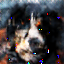

In [ ]:
pil_doggo = torchvision.transforms.ToPILImage()(doggo)
display(pil_doggo)

In [ ]:
!rm -rf interp
!mkdir interp

In [ ]:
def linear_interpolate(code1, code2, alpha):
    return code1 * alpha + code2 * (1 - alpha)

#### z-space Interpolation

In [ ]:
# trainer_interp = pl.Trainer(fast_dev_run=False,    # For debugging purposes
#                      log_every_n_steps=1,   # set the logging frequency
#                      accelerator='auto',    # Precedence: tpu > gpu >> cpu
#                      devices="auto",        # all
#                      max_epochs=CONFIG['NUM_EPOCHS'], # number of epochs
#                      deterministic=True,    # keep it deterministic
#                      callbacks=[TQDMProgressBar(refresh_rate=25),
#                                 checkpoint_callback,
#                                 lr_monitor],
#                      logger=wandb_logger,    # wandb <3
#                      )

# gen_imgs, z1, z2 = trainer_interp.test(model_interp, train_dataloader)

model_interp.eval()

with torch.inference_mode():
    z1 = torch.randn(1, 100, 1, 1) # 1 x Z_d x 1 x 1
    z2 = torch.randn(1, 100, 1, 1) # 1 x Z_d x 1 x 1
    # print(z1, z2)

    gen_img_arr = []
    for i in tqdm(range(1001)):
      alpha = i/1000.0
      z_interp = linear_interpolate(z1, z2, alpha)

      gen_img = model_interp.generator(torch.randn(1,100,1,1)).squeeze()
      pil_gen_img = torchvision.transforms.ToPILImage()(gen_img)

      gen_img_arr.append(pil_gen_img)

      num = str(i).zfill(5)
      pil_gen_img.save(f"/content/interp/z_{num}.png")

  0%|          | 0/1001 [00:00<?, ?it/s]

In [ ]:
make_latent_interp_video(gen_img_arr)

In [ ]:
!zip -r /content/latent_interp.zip /content/interp

  adding: content/interp/ (stored 0%)
  adding: content/interp/z_00124.png (stored 0%)
  adding: content/interp/z_00977.png (stored 0%)
  adding: content/interp/z_00110.png (stored 0%)
  adding: content/interp/z_00650.png (stored 0%)
  adding: content/interp/z_00587.png (stored 0%)
  adding: content/interp/z_00451.png (stored 0%)
  adding: content/interp/z_00386.png (stored 0%)
  adding: content/interp/z_00454.png (stored 0%)
  adding: content/interp/z_00980.png (stored 0%)
  adding: content/interp/z_00282.png (stored 0%)
  adding: content/interp/z_00153.png (stored 0%)
  adding: content/interp/z_00203.png (stored 0%)
  adding: content/interp/z_00627.png (stored 0%)
  adding: content/interp/z_00726.png (stored 0%)
  adding: content/interp/z_00139.png (stored 0%)
  adding: content/interp/z_00955.png (stored 0%)
  adding: content/interp/z_00503.png (stored 0%)
  adding: content/interp/z_00434.png (stored 0%)
  adding: content/interp/z_00702.png (stored 0%)
  adding: content/interp/z_0059

#### W-space interpolation

Detach Mapper == Make the Mapper -> Identity Function

In [ ]:
model_interp.generator.mapper = nn.Identity()
model_interp.generator.act = nn.Identity()

In [ ]:
print(model_interp)

LIT_DCGAN(
  (discriminator): Discriminator(
    (model): Sequential(
      (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): LeakyReLU(negative_slope=0.2, inplace=True)
      (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (4): LeakyReLU(negative_slope=0.2, inplace=True)
      (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (7): LeakyReLU(negative_slope=0.2, inplace=True)
      (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (10): LeakyReLU(negative_slope=0.2, inplace=True)
      (11): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)

In [ ]:
!rm -rf interp_wspace
!mkdir interp_wspace
!rm -rf *.gif
!rm -rf *.zip

Same inference code as above (make it a function?)

In [ ]:
w1 = torch.Tensor([[-0.0202, -0.0682,  0.7329, -0.0784, -0.0581,  0.4230,  0.2379, -0.0833,
          0.7884,  0.2248,  0.2776, -0.0364,  0.2855,  0.7926,  1.1424,  0.2005,
         -0.1099, -0.0617, -0.0450, -0.0446,  0.5390,  0.4721,  0.3224, -0.0937,
          0.6817,  0.3990, -0.0531,  0.3876,  0.4818, -0.0865, -0.0473,  0.6816,
          0.3565, -0.1395,  0.1849,  0.5416, -0.0338, -0.0528, -0.0569, -0.0390,
         -0.0337, -0.0225, -0.0631, -0.0995, -0.1762, -0.0521, -0.0237, -0.0258,
         -0.0525, -0.1756, -0.0153, -0.0088, -0.0759,  0.2723, -0.1178, -0.0943,
         -0.0561, -0.0397, -0.0513, -0.1754,  0.0962,  0.1861, -0.0554, -0.1032,
          0.2359,  0.1748,  0.9084,  0.6256, -0.0803, -0.1207,  0.4919, -0.1091,
         -0.2582, -0.0199, -0.0550, -0.0362,  0.2747, -0.0628,  0.3789,  0.1299,
         -0.0490, -0.0707, -0.0169,  0.3357,  1.2385, -0.0504, -0.0400, -0.0192,
         -0.0951,  0.0283, -0.0648, -0.0835, -0.0373, -0.0644, -0.0554,  0.4078,
          0.8167, -0.0814,  0.3089, -0.1398]])

w1 = w1[:,:,None,None]

w2 = torch.Tensor([[-0.0815, -0.0812,  1.0785, -0.0337,  0.2382, -0.0653, -0.0843, -0.0853,
         -0.0079,  0.1121,  0.4561, -0.0434,  0.0715,  0.1232, -0.0807, -0.0287,
         -0.1417, -0.0685, -0.0447, -0.0280,  0.0060, -0.0158,  0.0893, -0.1232,
         -0.0422,  0.0831, -0.0311, -0.0249,  0.3923, -0.0615,  0.6317, -0.0238,
          1.0377,  0.7621, -0.1357, -0.0412,  0.2459, -0.0524, -0.0851, -0.0426,
         -0.0411,  0.1024,  0.1441, -0.2577, -0.3709,  0.1332,  0.4081,  0.4787,
         -0.0377, -0.1412,  0.0837, -0.1878, -0.0450,  0.6566,  0.5865,  0.2882,
         -0.2444, -0.1360,  0.0099, -0.0961, -0.0145, -0.0230, -0.0588, -0.0809,
          0.5434, -0.0609, -0.0397, -0.0355, -0.0937, -0.2652, -0.0361,  0.6187,
         -0.3286,  0.3020, -0.0316,  0.3171,  1.2937, -0.0932, -0.0545, -0.0292,
         -0.0029, -0.0697, -0.0190,  0.6632,  0.0651, -0.0311, -0.0555, -0.0942,
          0.4408, -0.0249,  0.4270, -0.0886,  0.3606, -0.0702, -0.0552, -0.0330,
          0.0201,  0.4094,  0.7881,  0.2090]])

w2 = w2[:,:,None,None]
print(w1.shape, w2.shape)

torch.Size([1, 100, 1, 1]) torch.Size([1, 100, 1, 1])


In [ ]:
# w-space interpolation

model_interp.eval()

with torch.inference_mode():

    gen_img_arr_wspace = []
    for i in tqdm(range(1001)):
      alpha = i/1000.0
      z_interp = linear_interpolate(w1, w2, alpha) # w1 and w2 are defined above

      gen_img = model_interp.generator(torch.randn(1,100,1,1)).squeeze()
      pil_gen_img = torchvision.transforms.ToPILImage()(gen_img)

      gen_img_arr_wspace.append(pil_gen_img)

      num = str(i).zfill(5)
      pil_gen_img.save(f"/content/interp_wspace/w_{num}.png")

  0%|          | 0/1001 [00:00<?, ?it/s]

In [ ]:
def make_latent_interp_video(gen_imgs):
  gen_imgs[0].save("out_10fps_wspace_1May.gif", save_all=True, append_images=gen_imgs, duration=100, loop=0)

In [ ]:
make_latent_interp_video(gen_img_arr_wspace)

In [ ]:
!zip -r /content/w_space_2.zip /content/interp_wspace

  adding: content/interp_wspace/ (stored 0%)
  adding: content/interp_wspace/w_00284.png (stored 0%)
  adding: content/interp_wspace/w_00975.png (stored 0%)
  adding: content/interp_wspace/w_00248.png (stored 0%)
  adding: content/interp_wspace/w_00354.png (stored 0%)
  adding: content/interp_wspace/w_00005.png (stored 0%)
  adding: content/interp_wspace/w_00172.png (stored 0%)
  adding: content/interp_wspace/w_00045.png (stored 0%)
  adding: content/interp_wspace/w_00387.png (stored 0%)
  adding: content/interp_wspace/w_00793.png (deflated 5%)
  adding: content/interp_wspace/w_00829.png (stored 0%)
  adding: content/interp_wspace/w_00351.png (stored 0%)
  adding: content/interp_wspace/w_00469.png (stored 0%)
  adding: content/interp_wspace/w_00660.png (stored 0%)
  adding: content/interp_wspace/w_00317.png (stored 0%)
  adding: content/interp_wspace/w_00115.png (stored 0%)
  adding: content/interp_wspace/w_00868.png (stored 0%)
  adding: content/interp_wspace/w_00319.png (stored 0%)
 

### Residual Connections

In [ ]:
# import required libraries
import torch
from torch import nn
import torch.nn.functional as F
import torchvision


class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=[1, 1], downsample=None):
        super(ResidualBlock, self).__init__()

        pass

    def forward(self, x):
        pass